In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def minha_rgb_para_hsv(imagem_rgb):
    img = np.array(imagem_rgb).astype('float32') / 255.0
    R, G, B = img[..., 0], img[..., 1], img[..., 2]
    Cmax = np.max(img, axis=2)
    Cmin = np.min(img, axis=2)
    delta = Cmax - Cmin
    H = np.zeros_like(Cmax)
    S = np.zeros_like(Cmax)
    V = Cmax
    mask = delta != 0
    idx = (Cmax == R) & mask
    H[idx] = (60 * (G[idx] - B[idx]) / delta[idx]) % 360
    idx = (Cmax == G) & mask
    H[idx] = (60 * (B[idx] - R[idx]) / delta[idx]) + 120
    idx = (Cmax == B) & mask
    H[idx] = (60 * (R[idx] - G[idx]) / delta[idx]) + 240
    S[Cmax != 0] = delta[Cmax != 0] / Cmax[Cmax != 0]
    H = (H / 360) * 255
    S = S * 255
    V = V * 255
    hsv = np.stack([H, S, V], axis=2).astype(np.uint8)
    return hsv


In [ ]:
caminho_imagem = r"C:\Users\vish8\OneDrive\Desktop\P7\C209\AtvRepo\RGB.jpeg"
imagem_rgb = Image.open(caminho_imagem).convert('RGB')
imagem_rgb.show()

In [ ]:
imagem_hsv_array = minha_rgb_para_hsv(minha_imagem_rgb)
imagem_hsv = Image.fromarray(minha_imagem_hsv_array, mode='HSV')
imagem_hsv.show()


In [ ]:
pil_imagem_hsv = imagem_rgb.convert('HSV')
imagem_rgb_de_volta = imagem_hsv.convert('RGB')
imagem_rgb_de_volta.show()


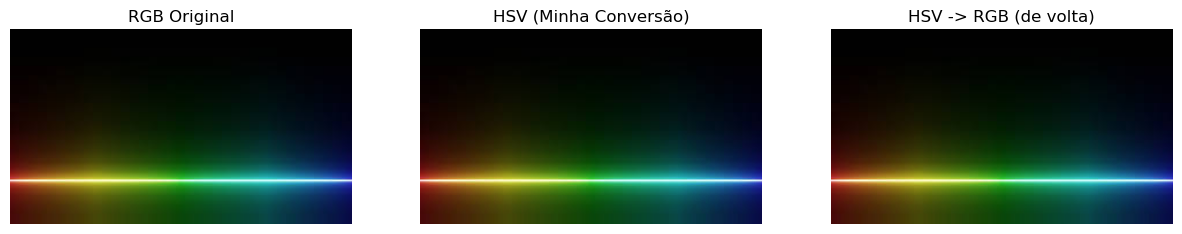

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("RGB Original")
plt.imshow(imagem_rgb)
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title("HSV (Minha Conversão)")
plt.imshow(imagem_hsv)
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title("HSV -> RGB (de volta)")
plt.imshow(imagem_rgb_de_volta)
plt.axis('off')
plt.show()
